<div class="alert alert-block alert-info">

# Deep Learning Project - Classification of Open or Closed Eyes<a class="anchor"><a id='title'></a></b><br>
[<font color='#000000'>1. Preparing folders and data</font>](#fold) <br>
[<font color='#000000'>2. Models without data augmentation</font>](#simple)<br>
[<font color='#000000'>3. Models with data augmentation</font>](#da)<br> 
[<font color='#000000'>4. Adding callbacks</font>](#cb)<br>
[<font color='#000000'>Best Model</font>](#bm)<br>
__    
    
[<font color='#000000'>Drowsiness System Implementation</font>](#system)<br>

</div>

In [1]:
import numpy as np
np.random.seed(1337)
from numpy import expand_dims
import os
import shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, callbacks,regularizers

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">

## 1. Preparing folders and data</font> <a class="anchor" id="fold"></a>

  [Back to introduction](#title)
  
</div>

### Datasets - Directories

In [2]:
dataset_open_directory='C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/dataset_B_FacialImages/OpenFace'
dataset_close_directory='C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/dataset_B_FacialImages/ClosedFace'
base_dir='C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/Modelo'
os.mkdir(base_dir)

train_dir=os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_open_dir=os.path.join(train_dir,'open')
os.mkdir(train_open_dir)

validation_open_dir=os.path.join(validation_dir,'open')
os.mkdir(validation_open_dir)

train_close_dir=os.path.join(train_dir,'close')
os.mkdir(train_close_dir)

validation_close_dir=os.path.join(validation_dir,'close')
os.mkdir(validation_close_dir)


test_folder=os.path.join(test_dir,'test_folder')
os.mkdir(test_folder)

### Data Partition

In [3]:
# fill in each folder with images from each class

fnames=[os.listdir(dataset_open_directory)[i] for i in range(616)]
for fname in fnames:
    src=os.path.join(dataset_open_directory, fname)
    dst=os.path.join(train_open_dir, fname)
    shutil.copyfile(src,dst)

In [4]:
fnames=[os.listdir(dataset_open_directory)[i] for i in range(616, 924)]
for fname in fnames:
    src=os.path.join(dataset_open_directory, fname)
    dst=os.path.join(validation_open_dir, fname)
    shutil.copyfile(src,dst)

In [5]:
fnames=[os.listdir(dataset_close_directory)[i] for i in range(597)]
for fname in fnames:
    src=os.path.join(dataset_close_directory, fname)
    dst=os.path.join(train_close_dir, fname)
    shutil.copyfile(src,dst)

In [6]:
fnames=[os.listdir(dataset_close_directory)[i] for i in range(597, 895)]
for fname in fnames:
    src=os.path.join(dataset_close_directory, fname)
    dst=os.path.join(validation_close_dir, fname)
    shutil.copyfile(src,dst)

In [7]:
fnames=[os.listdir(dataset_open_directory)[i] for i in range(924, 1232)]
for fname in fnames:
    src=os.path.join(dataset_open_directory, fname)
    dst=os.path.join(test_folder, fname)
    shutil.copyfile(src,dst)

fnames=[os.listdir(dataset_close_directory)[i] for i in range(895, 1193)]
for fname in fnames:
    src=os.path.join(dataset_close_directory, fname)
    dst=os.path.join(test_folder, fname)
    shutil.copyfile(src,dst)

<div class="alert alert-block alert-info">

## 2. Models without data augmentation</font> <a class="anchor" id="simple"></a>

  [Back to introduction](#title)
  
</div>

### Preprocessing without Data Augmentation

In [10]:
train_datagen=ImageDataGenerator(rescale = 1./255)

In [11]:
validation_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(100, 100),
                                                  batch_size=20, #or=32,
                                                  class_mode='binary',
                                                  seed=42) # we need binary labels

Found 1213 images belonging to 2 classes.


In [13]:
validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                                            target_size=(100, 100),
                                                            batch_size=20, #or=32,
                                                            class_mode='binary',
                                                            seed=42)

Found 606 images belonging to 2 classes.


### 1) Simplest model

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [16]:
model_1=model.fit_generator(train_generator, 
                            steps_per_epoch=38, # specify how many samples to draw from the generator
                            epochs=100, 
                            validation_data=validation_generator, # if we specify this, we must also specify the below
                            validation_steps=19) # this is the nr of batches

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
38/38 [==============================] - 29s 688ms/step - loss: 0.7707 - acc: 0.5661 - val_loss: 0.6321 - val_acc: 0.5947
Epoch 2/100
38/38 [==============================] - 9s 233ms/step - loss: 0.6278 - acc: 0.6562 - val_loss: 0.5762 - val_acc: 0.7421
Epoch 3/100
38/38 [==============================] - 6s 158ms/step - loss: 0.5745 - acc: 0.7381 - val_loss: 0.5629 - val_acc: 0.7263
Epoch 4/100
38/38 [==============================] - 5s 121ms/step - loss: 0.5930 - acc: 0.6759 - val_loss: 0.5536 - val_acc: 0.7474
Epoch 5/100
38/38 [==============================] - 5s 121ms/step - loss: 0.5503 - acc: 0.7416 - val_loss: 0.5579 - val_acc: 0.6974
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.5573 - acc: 0.7376 - val_loss: 0.5301 - val_acc: 0.7342
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.5129 - acc: 0.7805 - val_loss: 0.4968 - val_acc: 0.7816
Epoch 8/100
38/38 [==============================] - 4s 116ms/step -

Epoch 62/100
38/38 [==============================] - 4s 111ms/step - loss: 0.2272 - acc: 0.9307 - val_loss: 0.3666 - val_acc: 0.8237
Epoch 63/100
38/38 [==============================] - 4s 111ms/step - loss: 0.2075 - acc: 0.9108 - val_loss: 0.3235 - val_acc: 0.8447
Epoch 64/100
38/38 [==============================] - 4s 114ms/step - loss: 0.2249 - acc: 0.9182 - val_loss: 0.3544 - val_acc: 0.8184
Epoch 65/100
38/38 [==============================] - 4s 109ms/step - loss: 0.2201 - acc: 0.9193 - val_loss: 0.3208 - val_acc: 0.8526acc: 0.
Epoch 66/100
38/38 [==============================] - 4s 116ms/step - loss: 0.1882 - acc: 0.9299 - val_loss: 0.3718 - val_acc: 0.8474
Epoch 67/100
38/38 [==============================] - 4s 112ms/step - loss: 0.2181 - acc: 0.9140 - val_loss: 0.3369 - val_acc: 0.8553
Epoch 68/100
38/38 [==============================] - 4s 117ms/step - loss: 0.2563 - acc: 0.8967 - val_loss: 0.4602 - val_acc: 0.7895
Epoch 69/100
38/38 [==============================] - 4

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
m_1=model.fit_generator(train_generator, 
                            steps_per_epoch=38,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=19)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
38/38 [==============================] - 18s 460ms/step - loss: 0.8018 - acc: 0.5401 - val_loss: 0.7329 - val_acc: 0.5000
Epoch 2/100
38/38 [==============================] - 6s 146ms/step - loss: 0.6291 - acc: 0.6454 - val_loss: 0.6495 - val_acc: 0.5726
Epoch 3/100
38/38 [==============================] - 5s 132ms/step - loss: 0.5947 - acc: 0.7151 - val_loss: 0.5787 - val_acc: 0.7063
Epoch 4/100
38/38 [==============================] - 5s 132ms/step - loss: 0.5796 - acc: 0.7005 - val_loss: 0.6561 - val_acc: 0.5875
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 0.5468 - acc: 0.7090 - val_loss: 0.5510 - val_acc: 0.7096
Epoch 6/100
38/38 [==============================] - 5s 131ms/step - loss: 0.5219 - acc: 0.7412 - val_loss: 0.6440 - val_acc: 0.5891
Epoch 7/100
38/38 [==============================] - 5s 126ms/step - loss: 0.5380 - acc: 0.7280 - val_loss: 0.6541 - val_acc: 0.5908
Epoch 8/100
38/38 [==============================] - 5s 128ms/step -

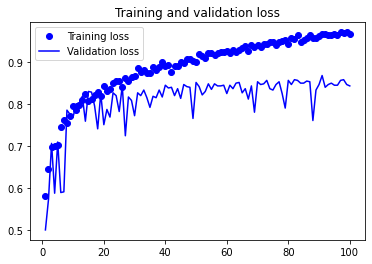

In [15]:
import matplotlib.pyplot as plt

acc=m_1.history['acc']
val_acc=m_1.history['val_acc']
loss=m_1.history['loss']
val_loss=m_1.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training loss')
plt.plot(epochs, val_acc,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

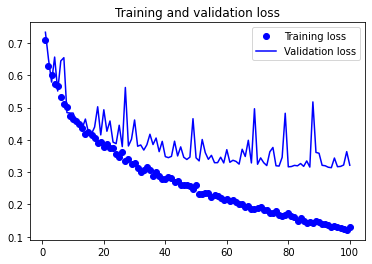

In [16]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### 2) Simplest model but with batch_size=20

In [14]:
model = models.Sequential()
# add convolutional layer
model.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 76832)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 76833     
Total params: 77,729
Trainable params: 77,729
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_2=model.fit_generator(
                            train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

Epoch 1/100
61/61 [==============================] - 13s 182ms/step - loss: 0.7355 - acc: 0.6079 - val_loss: 0.5964 - val_acc: 0.7100
Epoch 2/100
61/61 [==============================] - 5s 74ms/step - loss: 0.6315 - acc: 0.6388 - val_loss: 0.6762 - val_acc: 0.5667
Epoch 3/100
61/61 [==============================] - 5s 79ms/step - loss: 0.5702 - acc: 0.7064 - val_loss: 0.6033 - val_acc: 0.6450
Epoch 4/100
61/61 [==============================] - 5s 78ms/step - loss: 0.5594 - acc: 0.7098 - val_loss: 0.5254 - val_acc: 0.7500
Epoch 5/100
61/61 [==============================] - 5s 78ms/step - loss: 0.5283 - acc: 0.7425 - val_loss: 0.5062 - val_acc: 0.7667
Epoch 6/100
61/61 [==============================] - 5s 78ms/step - loss: 0.4784 - acc: 0.7738 - val_loss: 0.5472 - val_acc: 0.7033
Epoch 7/100
61/61 [==============================] - 5s 78ms/step - loss: 0.4995 - acc: 0.7585 - val_loss: 0.5674 - val_acc: 0.6850
Epoch 8/100
61/61 [==============================] - 5s 78ms/step - loss: 

### 3) Still only 1 layer, batch_size 20 and activation relu

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [16]:
model_3=model.fit_generator(
                            train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 29s 445ms/step - loss: 0.7177 - acc: 0.5513 - val_loss: 0.6288 - val_acc: 0.6733
Epoch 2/100
61/61 [==============================] - 7s 110ms/step - loss: 0.6038 - acc: 0.6940 - val_loss: 0.5822 - val_acc: 0.7300
Epoch 3/100
61/61 [==============================] - 7s 111ms/step - loss: 0.5804 - acc: 0.7116 - val_loss: 0.5540 - val_acc: 0.7383
Epoch 4/100
61/61 [==============================] - 7s 113ms/step - loss: 0.5460 - acc: 0.7557 - val_loss: 0.5315 - val_acc: 0.7567
Epoch 5/100
61/61 [==============================] - 7s 112ms/step - loss: 0.5401 - acc: 0.7440 - val_loss: 0.5429 - val_acc: 0.7183
Epoch 6/100
61/61 [==============================] - 7s 112ms/step - loss: 0.4985 - acc: 0.7815 - val_loss: 0.4984 - val_acc: 0.7783
Epoch 7/100
61/61 [==============================] - 7s 113ms/step - loss: 0.4735 - acc: 0.7789 - val_loss: 0.4752 - val_acc: 0.8067
Epoch 8/100
61/61 [==============================] - 7s 113ms/step -

Epoch 62/100
61/61 [==============================] - 7s 118ms/step - loss: 0.1528 - acc: 0.9629 - val_loss: 0.3284 - val_acc: 0.8583
Epoch 63/100
61/61 [==============================] - 7s 116ms/step - loss: 0.1492 - acc: 0.9691 - val_loss: 0.3167 - val_acc: 0.8517
Epoch 64/100
61/61 [==============================] - 7s 114ms/step - loss: 0.1556 - acc: 0.9616 - val_loss: 0.3030 - val_acc: 0.8667
Epoch 65/100
61/61 [==============================] - 7s 118ms/step - loss: 0.1577 - acc: 0.9546 - val_loss: 0.3318 - val_acc: 0.8450
Epoch 66/100
61/61 [==============================] - 7s 115ms/step - loss: 0.1505 - acc: 0.9618 - val_loss: 0.2976 - val_acc: 0.8650
Epoch 67/100
61/61 [==============================] - 7s 113ms/step - loss: 0.1543 - acc: 0.9616 - val_loss: 0.3015 - val_acc: 0.8700
Epoch 68/100
61/61 [==============================] - 7s 114ms/step - loss: 0.1494 - acc: 0.9585 - val_loss: 0.3023 - val_acc: 0.8600
Epoch 69/100
61/61 [==============================] - 7s 113ms

### 4) Still only 1 layer, batch_size 20, activation relu and optimizer Adam

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['acc'])

In [15]:
model_4=model.fit_generator(
                            train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

Epoch 1/100
61/61 [==============================] - 26s 402ms/step - loss: 0.7086 - acc: 0.5757 - val_loss: 0.6012 - val_acc: 0.6750
Epoch 2/100
61/61 [==============================] - 7s 119ms/step - loss: 0.5628 - acc: 0.7081 - val_loss: 0.4920 - val_acc: 0.7567
Epoch 3/100
61/61 [==============================] - 7s 109ms/step - loss: 0.4021 - acc: 0.8277 - val_loss: 0.3908 - val_acc: 0.8300
Epoch 4/100
61/61 [==============================] - 7s 110ms/step - loss: 0.3334 - acc: 0.8528 - val_loss: 0.3728 - val_acc: 0.8333
Epoch 5/100
61/61 [==============================] - 7s 113ms/step - loss: 0.2681 - acc: 0.9162 - val_loss: 0.3160 - val_acc: 0.8717
Epoch 6/100
61/61 [==============================] - 6s 100ms/step - loss: 0.2189 - acc: 0.9221 - val_loss: 0.3114 - val_acc: 0.8467
Epoch 7/100
61/61 [==============================] - 6s 104ms/step - loss: 0.1513 - acc: 0.9619 - val_loss: 0.2738 - val_acc: 0.8767
Epoch 8/100
61/61 [==============================] - 6s 100ms/step -

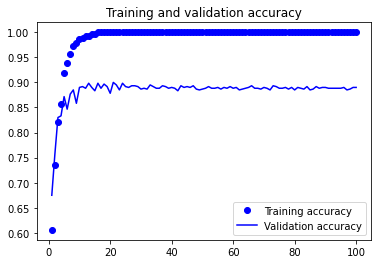

In [17]:
import matplotlib.pyplot as plt

acc=model_3.history['acc']
val_acc=model_3.history['val_acc']
loss=model_3.history['loss']
val_loss=model_3.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs, val_acc,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

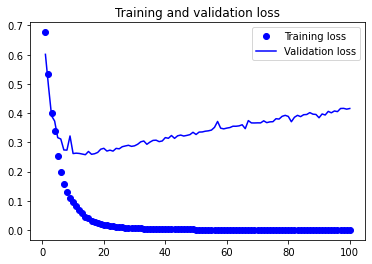

In [18]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### 5) Adding another layer

In [14]:
model = models.Sequential()
# add convolutional layer
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
model_5=model.fit_generator(
                            train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 37s 552ms/step - loss: 0.6833 - acc: 0.5532 - val_loss: 0.6543 - val_acc: 0.6467
Epoch 2/100
61/61 [==============================] - 12s 197ms/step - loss: 0.6431 - acc: 0.6360 - val_loss: 0.6256 - val_acc: 0.6767
Epoch 3/100
61/61 [==============================] - 12s 198ms/step - loss: 0.6225 - acc: 0.6757 - val_loss: 0.5966 - val_acc: 0.6950
Epoch 4/100
61/61 [==============================] - 12s 196ms/step - loss: 0.5828 - acc: 0.7069 - val_loss: 0.5693 - val_acc: 0.7183
Epoch 5/100
61/61 [==============================] - 12s 201ms/step - loss: 0.5710 - acc: 0.7199 - val_loss: 0.5803 - val_acc: 0.6833
Epoch 6/100
61/61 [==============================] - 12s 198ms/step - loss: 0.5381 - acc: 0.7574 - val_loss: 0.5613 - val_acc: 0.6917
Epoch 7/100
61/61 [==============================] - 12s 204ms/step - loss: 0.5250 - acc: 0.7689 - val_loss: 0.5030 - val_acc: 0.7717
Epoch 8/100
61/61 [==============================] - 12s 200ms

### 6) Adding one more layer

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
model_6=model.fit_generator(
                            train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 34s 527ms/step - loss: 0.6854 - acc: 0.5666 - val_loss: 0.6843 - val_acc: 0.4783
Epoch 2/100
61/61 [==============================] - 15s 248ms/step - loss: 0.6498 - acc: 0.6104 - val_loss: 0.6431 - val_acc: 0.6550
Epoch 3/100
61/61 [==============================] - 15s 247ms/step - loss: 0.6347 - acc: 0.6684 - val_loss: 0.6248 - val_acc: 0.6650
Epoch 4/100
61/61 [==============================] - 15s 249ms/step - loss: 0.6305 - acc: 0.6526 - val_loss: 0.6091 - val_acc: 0.6867
Epoch 5/100
61/61 [==============================] - 15s 249ms/step - loss: 0.6147 - acc: 0.6803 - val_loss: 0.5973 - val_acc: 0.6733
Epoch 6/100
61/61 [==============================] - 15s 250ms/step - loss: 0.5963 - acc: 0.6875 - val_loss: 0.5871 - val_acc: 0.6850
Epoch 7/100
61/61 [==============================] - 15s 248ms/step - loss: 0.5756 - acc: 0.7185 - val_loss: 0.6120 - val_acc: 0.6333
Epoch 8/100
61/61 [==============================] - 16s 256ms

Epoch 62/100
61/61 [==============================] - 11s 185ms/step - loss: 0.0856 - acc: 0.9710 - val_loss: 0.2987 - val_acc: 0.8767
Epoch 63/100
61/61 [==============================] - 11s 182ms/step - loss: 0.1000 - acc: 0.9641 - val_loss: 0.2743 - val_acc: 0.8800
Epoch 64/100
61/61 [==============================] - 11s 182ms/step - loss: 0.0864 - acc: 0.9674 - val_loss: 0.2259 - val_acc: 0.8967
Epoch 65/100
61/61 [==============================] - 11s 184ms/step - loss: 0.0694 - acc: 0.9876 - val_loss: 0.2801 - val_acc: 0.8900
Epoch 66/100
61/61 [==============================] - 12s 199ms/step - loss: 0.0836 - acc: 0.9771 - val_loss: 0.2286 - val_acc: 0.8983
Epoch 67/100
61/61 [==============================] - 11s 184ms/step - loss: 0.0660 - acc: 0.9828 - val_loss: 0.2273 - val_acc: 0.8950
Epoch 68/100
61/61 [==============================] - 11s 185ms/step - loss: 0.0662 - acc: 0.9821 - val_loss: 0.2428 - val_acc: 0.9000
Epoch 69/100
61/61 [==============================] - 1

### 7) 3 layers and a dense layer

In [13]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
model_7=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 25s 393ms/step - loss: 0.6991 - acc: 0.5560 - val_loss: 0.6090 - val_acc: 0.6783
Epoch 2/100
61/61 [==============================] - 17s 280ms/step - loss: 0.5978 - acc: 0.6984 - val_loss: 0.6821 - val_acc: 0.5500
Epoch 3/100
61/61 [==============================] - 16s 270ms/step - loss: 0.5554 - acc: 0.7032 - val_loss: 0.5255 - val_acc: 0.7267
Epoch 4/100
61/61 [==============================] - 17s 280ms/step - loss: 0.4995 - acc: 0.7366 - val_loss: 0.4837 - val_acc: 0.7517
Epoch 5/100
61/61 [==============================] - 17s 282ms/step - loss: 0.4618 - acc: 0.7821 - val_loss: 0.4150 - val_acc: 0.8267
Epoch 6/100
61/61 [==============================] - 18s 296ms/step - loss: 0.3867 - acc: 0.8260 - val_loss: 0.3807 - val_acc: 0.8367
Epoch 7/100
61/61 [==============================] - 18s 289ms/step - loss: 0.3591 - acc: 0.8452 - val_loss: 0.4904 - val_acc: 0.7550
Epoch 8/100
61/61 [==============================] - 17s 279ms

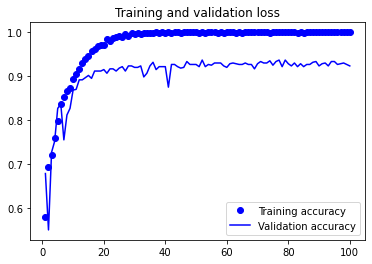

In [15]:
import matplotlib.pyplot as plt

acc=model_7.history['acc']
val_acc=model_7.history['val_acc']
loss=model_7.history['loss']
val_loss=model_7.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs, val_acc,'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.legend()

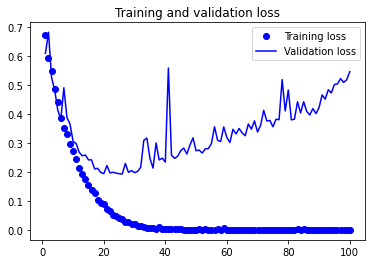

In [16]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

<div class="alert alert-block alert-info">

## 3. Models with data augmentation</font> <a class="anchor" id="da"></a>

  [Back to introduction](#title)
  
</div>

### Preprocessing with Data Augmentation

In [8]:
train_datagen=ImageDataGenerator(rescale = 1./255,
                          rotation_range=40,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')

In [9]:
validation_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(100, 100),
                                                  batch_size=20, 
                                                  class_mode='binary',
                                                  seed=42)

Found 1213 images belonging to 2 classes.


In [11]:
validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                                            target_size=(100, 100),
                                                            batch_size=20, 
                                                            class_mode='binary',
                                                            seed=42)

Found 606 images belonging to 2 classes.


#### Plotting an image transformation

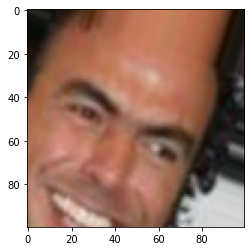

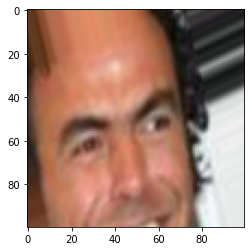

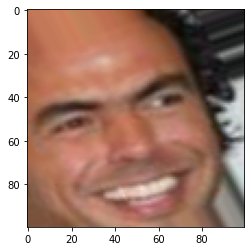

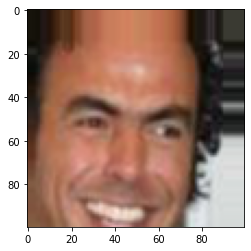

In [13]:
fnames=[os.path.join(train_open_dir, fname) for fname in os.listdir(train_open_dir)]
img_path=fnames[17]
img=image.load_img(img_path, target_size=(100,100))
x= image.img_to_array(img)
x=x.reshape((1, )+ x.shape)
i=0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
plt.show()

### 1) With 3 layers and dropout layer of 0.5

In [15]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [17]:
model_dp_1=model.fit_generator(
                            train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 32s 489ms/step - loss: 0.7002 - acc: 0.5130 - val_loss: 0.6832 - val_acc: 0.5200
Epoch 2/100
61/61 [==============================] - 21s 336ms/step - loss: 0.6572 - acc: 0.6092 - val_loss: 0.6274 - val_acc: 0.6650
Epoch 3/100
61/61 [==============================] - 18s 295ms/step - loss: 0.6351 - acc: 0.6647 - val_loss: 0.6280 - val_acc: 0.6383
Epoch 4/100
61/61 [==============================] - 18s 296ms/step - loss: 0.6238 - acc: 0.6657 - val_loss: 0.6011 - val_acc: 0.6717
Epoch 5/100
61/61 [==============================] - 18s 294ms/step - loss: 0.6136 - acc: 0.6583 - val_loss: 0.6513 - val_acc: 0.6167
Epoch 6/100
61/61 [==============================] - 18s 298ms/step - loss: 0.6103 - acc: 0.6726 - val_loss: 0.5690 - val_acc: 0.6900
Epoch 7/100
61/61 [==============================] - 18s 293ms/step - loss: 0.5923 - acc: 0.6812 - val_loss: 0.5725 - val_acc: 0.7050
Epoch 8/100
61/61 [==============================] - 18s 297ms

Epoch 62/100
61/61 [==============================] - 19s 306ms/step - loss: 0.3674 - acc: 0.8490 - val_loss: 0.3009 - val_acc: 0.8800
Epoch 63/100
61/61 [==============================] - 18s 300ms/step - loss: 0.3538 - acc: 0.8577 - val_loss: 0.2980 - val_acc: 0.8783
Epoch 64/100
61/61 [==============================] - 18s 297ms/step - loss: 0.3705 - acc: 0.8419 - val_loss: 0.4328 - val_acc: 0.8050
Epoch 65/100
61/61 [==============================] - 19s 303ms/step - loss: 0.3802 - acc: 0.8311 - val_loss: 0.2918 - val_acc: 0.8800
Epoch 66/100
61/61 [==============================] - 19s 303ms/step - loss: 0.3704 - acc: 0.8389 - val_loss: 0.2950 - val_acc: 0.8883
Epoch 67/100
61/61 [==============================] - 18s 300ms/step - loss: 0.3662 - acc: 0.8425 - val_loss: 0.2676 - val_acc: 0.8917
Epoch 68/100
61/61 [==============================] - 18s 296ms/step - loss: 0.3583 - acc: 0.8505 - val_loss: 0.3300 - val_acc: 0.8400
Epoch 69/100
61/61 [==============================] - 1

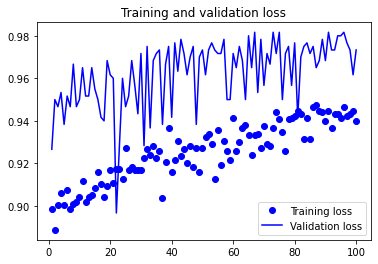

In [27]:
import matplotlib.pyplot as plt

acc=model_dp_1.history['acc']
val_acc=model_dp_1.history['val_acc']
loss=model_dp_1.history['loss']
val_loss=model_dp_1.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs, val_acc,'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.legend()

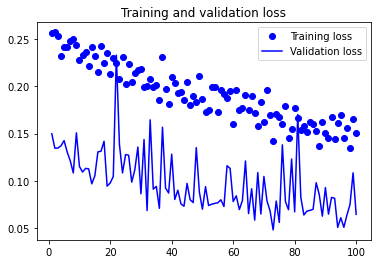

In [28]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### 2) Dropout of 0.5 without dense layer of 512

In [17]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [18]:
model_dp_2=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 40s 626ms/step - loss: 0.6961 - acc: 0.4804 - val_loss: 0.6802 - val_acc: 0.6683
Epoch 2/100
61/61 [==============================] - 19s 303ms/step - loss: 0.6809 - acc: 0.5636 - val_loss: 0.6673 - val_acc: 0.6200
Epoch 3/100
61/61 [==============================] - 18s 297ms/step - loss: 0.6684 - acc: 0.6189 - val_loss: 0.6488 - val_acc: 0.6600
Epoch 4/100
61/61 [==============================] - 18s 291ms/step - loss: 0.6570 - acc: 0.6139 - val_loss: 0.6430 - val_acc: 0.6233
Epoch 5/100
61/61 [==============================] - 18s 293ms/step - loss: 0.6391 - acc: 0.6499 - val_loss: 0.6358 - val_acc: 0.6217
Epoch 6/100
61/61 [==============================] - 18s 299ms/step - loss: 0.6284 - acc: 0.6394 - val_loss: 0.6617 - val_acc: 0.5483
Epoch 7/100
61/61 [==============================] - 18s 292ms/step - loss: 0.6426 - acc: 0.6087 - val_loss: 0.6556 - val_acc: 0.6067
Epoch 8/100
61/61 [==============================] - 18s 296ms

Epoch 62/100
61/61 [==============================] - 18s 292ms/step - loss: 0.5462 - acc: 0.7161 - val_loss: 0.4541 - val_acc: 0.7700
Epoch 63/100
61/61 [==============================] - 18s 290ms/step - loss: 0.5048 - acc: 0.7520 - val_loss: 0.4523 - val_acc: 0.7717
Epoch 64/100
61/61 [==============================] - 18s 292ms/step - loss: 0.5033 - acc: 0.7580 - val_loss: 0.4880 - val_acc: 0.7617
Epoch 65/100
61/61 [==============================] - 18s 296ms/step - loss: 0.4754 - acc: 0.7761 - val_loss: 0.5824 - val_acc: 0.6817
Epoch 66/100
61/61 [==============================] - 18s 289ms/step - loss: 0.5117 - acc: 0.7488 - val_loss: 0.4558 - val_acc: 0.7900
Epoch 67/100
61/61 [==============================] - 18s 288ms/step - loss: 0.4908 - acc: 0.7619 - val_loss: 0.6053 - val_acc: 0.6783
Epoch 68/100
61/61 [==============================] - 18s 290ms/step - loss: 0.4930 - acc: 0.7569 - val_loss: 0.4424 - val_acc: 0.7917
Epoch 69/100
61/61 [==============================] - 1

### 3) Dropout layer of 0.5 (but with batch_size 32)

In [ ]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [35]:
model_dp_3=model.fit_generator(train_generator, 
                            steps_per_epoch=38,
                            epochs=100, 
                            validation_data=validation_generator, 
                            validation_steps=19) 

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
38/38 [==============================] - 40s 1s/step - loss: 0.7213 - acc: 0.4873 - val_loss: 0.6588 - val_acc: 0.6238
Epoch 2/100
38/38 [==============================] - 18s 476ms/step - loss: 0.6605 - acc: 0.6199 - val_loss: 0.6966 - val_acc: 0.5066
Epoch 3/100
38/38 [==============================] - 18s 463ms/step - loss: 0.6568 - acc: 0.6055 - val_loss: 0.6936 - val_acc: 0.5479
Epoch 4/100
38/38 [==============================] - 18s 466ms/step - loss: 0.6468 - acc: 0.6228 - val_loss: 0.7198 - val_acc: 0.5396
Epoch 5/100
38/38 [==============================] - 18s 461ms/step - loss: 0.6409 - acc: 0.6448 - val_loss: 0.6088 - val_acc: 0.6469
Epoch 6/100
38/38 [==============================] - 18s 459ms/step - loss: 0.6229 - acc: 0.6449 - val_loss: 0.5823 - val_acc: 0.6782
Epoch 7/100
38/38 [==============================] - 18s 481ms/step - loss: 0.6215 - acc: 0.6476 - val_loss: 0.6035 - val_acc: 0.6502
Epoch 8/100
38/38 [==============================] - 18s 467ms/st

Epoch 62/100
38/38 [==============================] - 19s 492ms/step - loss: 0.4250 - acc: 0.8042 - val_loss: 0.3836 - val_acc: 0.8614
Epoch 63/100
38/38 [==============================] - 18s 473ms/step - loss: 0.4564 - acc: 0.7981 - val_loss: 0.3659 - val_acc: 0.8647
Epoch 64/100
38/38 [==============================] - 19s 491ms/step - loss: 0.4661 - acc: 0.7703 - val_loss: 0.3905 - val_acc: 0.8399
Epoch 65/100
38/38 [==============================] - 19s 489ms/step - loss: 0.4421 - acc: 0.8149 - val_loss: 0.4049 - val_acc: 0.8185
Epoch 66/100
38/38 [==============================] - 18s 479ms/step - loss: 0.4347 - acc: 0.8068 - val_loss: 0.3597 - val_acc: 0.8630
Epoch 67/100
38/38 [==============================] - 18s 462ms/step - loss: 0.4369 - acc: 0.8064 - val_loss: 0.3576 - val_acc: 0.8564
Epoch 68/100
38/38 [==============================] - 18s 478ms/step - loss: 0.4099 - acc: 0.7875 - val_loss: 0.4668 - val_acc: 0.7690
Epoch 69/100
38/38 [==============================] - 1

### 4) Dropout of 0.2

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
model_dp_4=model.fit_generator(
                            train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 26s 410ms/step - loss: 0.7047 - acc: 0.5529 - val_loss: 0.6421 - val_acc: 0.6383
Epoch 2/100
61/61 [==============================] - 23s 373ms/step - loss: 0.6474 - acc: 0.6405 - val_loss: 0.6275 - val_acc: 0.6483
Epoch 3/100
61/61 [==============================] - 19s 311ms/step - loss: 0.6550 - acc: 0.6266 - val_loss: 0.6440 - val_acc: 0.6300
Epoch 4/100
61/61 [==============================] - 17s 284ms/step - loss: 0.6441 - acc: 0.6365 - val_loss: 0.6259 - val_acc: 0.6317
Epoch 5/100
61/61 [==============================] - 16s 263ms/step - loss: 0.6229 - acc: 0.6531 - val_loss: 0.6344 - val_acc: 0.6233
Epoch 6/100
61/61 [==============================] - 16s 263ms/step - loss: 0.6126 - acc: 0.6893 - val_loss: 0.6012 - val_acc: 0.6817
Epoch 7/100
61/61 [==============================] - 16s 266ms/step - loss: 0.6222 - acc: 0.6822 - val_loss: 0.5899 - val_acc: 0.6767
Epoch 8/100
61/61 [==============================] - 16s 266ms

Epoch 62/100
61/61 [==============================] - 18s 301ms/step - loss: 0.3673 - acc: 0.8203 - val_loss: 0.2311 - val_acc: 0.9033
Epoch 63/100
61/61 [==============================] - 19s 314ms/step - loss: 0.3298 - acc: 0.8688 - val_loss: 0.2187 - val_acc: 0.9133
Epoch 64/100
61/61 [==============================] - 18s 299ms/step - loss: 0.3457 - acc: 0.8643 - val_loss: 0.2309 - val_acc: 0.9117
Epoch 65/100
61/61 [==============================] - 19s 313ms/step - loss: 0.3412 - acc: 0.8498 - val_loss: 0.2272 - val_acc: 0.8967
Epoch 66/100
61/61 [==============================] - 20s 321ms/step - loss: 0.3518 - acc: 0.8458 - val_loss: 0.2214 - val_acc: 0.9067
Epoch 67/100
61/61 [==============================] - 19s 315ms/step - loss: 0.2997 - acc: 0.8943 - val_loss: 0.2060 - val_acc: 0.9167
Epoch 68/100
61/61 [==============================] - 19s 316ms/step - loss: 0.2987 - acc: 0.8793 - val_loss: 0.2105 - val_acc: 0.9033
Epoch 69/100
61/61 [==============================] - 1

### 5) Dropout of 0.2 and only 2 layers

In [15]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [16]:
model_dp_5=model.fit_generator(
                            train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 58s 870ms/step - loss: 0.7042 - acc: 0.4948 - val_loss: 0.6829 - val_acc: 0.4900
Epoch 2/100
61/61 [==============================] - 16s 270ms/step - loss: 0.6797 - acc: 0.5544 - val_loss: 0.6587 - val_acc: 0.6317
Epoch 3/100
61/61 [==============================] - 18s 297ms/step - loss: 0.6593 - acc: 0.5978 - val_loss: 0.6359 - val_acc: 0.6400
Epoch 4/100
61/61 [==============================] - 17s 280ms/step - loss: 0.6523 - acc: 0.6077 - val_loss: 0.6246 - val_acc: 0.6683
Epoch 5/100
61/61 [==============================] - 16s 268ms/step - loss: 0.6377 - acc: 0.6525 - val_loss: 0.6175 - val_acc: 0.6650
Epoch 6/100
61/61 [==============================] - 17s 273ms/step - loss: 0.6351 - acc: 0.6455 - val_loss: 0.6329 - val_acc: 0.6417
Epoch 7/100
61/61 [==============================] - 17s 275ms/step - loss: 0.6298 - acc: 0.6492 - val_loss: 0.5971 - val_acc: 0.6750
Epoch 8/100
61/61 [==============================] - 17s 274ms

Epoch 62/100
61/61 [==============================] - 16s 258ms/step - loss: 0.5108 - acc: 0.7385 - val_loss: 0.4753 - val_acc: 0.7850
Epoch 63/100
61/61 [==============================] - 17s 277ms/step - loss: 0.5092 - acc: 0.7629 - val_loss: 0.4712 - val_acc: 0.7800
Epoch 64/100
61/61 [==============================] - 17s 271ms/step - loss: 0.5236 - acc: 0.7471 - val_loss: 0.4814 - val_acc: 0.7567
Epoch 65/100
61/61 [==============================] - 17s 282ms/step - loss: 0.4842 - acc: 0.7643 - val_loss: 0.4757 - val_acc: 0.7567
Epoch 66/100
61/61 [==============================] - 16s 266ms/step - loss: 0.5072 - acc: 0.7601 - val_loss: 0.5206 - val_acc: 0.7400
Epoch 67/100
61/61 [==============================] - 18s 302ms/step - loss: 0.5160 - acc: 0.7458 - val_loss: 0.4658 - val_acc: 0.7767
Epoch 68/100
61/61 [==============================] - 18s 298ms/step - loss: 0.5327 - acc: 0.7446 - val_loss: 0.4685 - val_acc: 0.7917
Epoch 69/100
61/61 [==============================] - 1

### 6) Dropout layer (0.3) and 3 layers

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
model_dp_6=model.fit_generator(
                            train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 28s 445ms/step - loss: 0.7127 - acc: 0.4786 - val_loss: 0.6470 - val_acc: 0.6450
Epoch 2/100
61/61 [==============================] - 19s 305ms/step - loss: 0.6575 - acc: 0.5898 - val_loss: 0.6321 - val_acc: 0.6283
Epoch 3/100
61/61 [==============================] - 19s 305ms/step - loss: 0.6302 - acc: 0.6487 - val_loss: 0.6873 - val_acc: 0.5700
Epoch 4/100
61/61 [==============================] - 17s 277ms/step - loss: 0.6484 - acc: 0.6279 - val_loss: 0.6007 - val_acc: 0.6567
Epoch 5/100
61/61 [==============================] - 17s 278ms/step - loss: 0.6027 - acc: 0.6900 - val_loss: 0.6126 - val_acc: 0.6450
Epoch 6/100
61/61 [==============================] - 17s 277ms/step - loss: 0.6130 - acc: 0.6699 - val_loss: 0.5768 - val_acc: 0.6783
Epoch 7/100
61/61 [==============================] - 17s 279ms/step - loss: 0.5926 - acc: 0.7062 - val_loss: 0.5441 - val_acc: 0.7167
Epoch 8/100
61/61 [==============================] - 17s 280ms

Epoch 62/100
61/61 [==============================] - 19s 319ms/step - loss: 0.3520 - acc: 0.8504 - val_loss: 0.2866 - val_acc: 0.8817
Epoch 63/100
61/61 [==============================] - 19s 312ms/step - loss: 0.3150 - acc: 0.8715 - val_loss: 0.2231 - val_acc: 0.9150
Epoch 64/100
61/61 [==============================] - 20s 325ms/step - loss: 0.3103 - acc: 0.8704 - val_loss: 0.2707 - val_acc: 0.8850
Epoch 65/100
61/61 [==============================] - 22s 357ms/step - loss: 0.3269 - acc: 0.8645 - val_loss: 0.2527 - val_acc: 0.8900
Epoch 66/100
61/61 [==============================] - 20s 330ms/step - loss: 0.3341 - acc: 0.8754 - val_loss: 0.2364 - val_acc: 0.8967
Epoch 67/100
61/61 [==============================] - 19s 309ms/step - loss: 0.2677 - acc: 0.8972 - val_loss: 0.2616 - val_acc: 0.8817
Epoch 68/100
61/61 [==============================] - 19s 319ms/step - loss: 0.2975 - acc: 0.8658 - val_loss: 0.2179 - val_acc: 0.9100
Epoch 69/100
61/61 [==============================] - 1

### 7) Dropout layer (0.3) with one more layer

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
model_dp_7=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 38s 588ms/step - loss: 0.6937 - acc: 0.5099 - val_loss: 0.6684 - val_acc: 0.5883
Epoch 2/100
61/61 [==============================] - 17s 285ms/step - loss: 0.6522 - acc: 0.6099 - val_loss: 0.6270 - val_acc: 0.6583
Epoch 3/100
61/61 [==============================] - 18s 300ms/step - loss: 0.6411 - acc: 0.6429 - val_loss: 0.6413 - val_acc: 0.6083
Epoch 4/100
61/61 [==============================] - 18s 298ms/step - loss: 0.6272 - acc: 0.6413 - val_loss: 0.6019 - val_acc: 0.6717
Epoch 5/100
61/61 [==============================] - 19s 313ms/step - loss: 0.6121 - acc: 0.6635 - val_loss: 0.6123 - val_acc: 0.6433
Epoch 6/100
61/61 [==============================] - 19s 314ms/step - loss: 0.6135 - acc: 0.6669 - val_loss: 0.5815 - val_acc: 0.6717
Epoch 7/100
61/61 [==============================] - 19s 310ms/step - loss: 0.5997 - acc: 0.6946 - val_loss: 0.6156 - val_acc: 0.6600
Epoch 8/100
61/61 [==============================] - 19s 314ms

Epoch 62/100
61/61 [==============================] - 18s 290ms/step - loss: 0.1629 - acc: 0.9350 - val_loss: 0.1186 - val_acc: 0.9600
Epoch 63/100
61/61 [==============================] - 19s 317ms/step - loss: 0.1882 - acc: 0.9267 - val_loss: 0.0916 - val_acc: 0.9683
Epoch 64/100
61/61 [==============================] - 17s 277ms/step - loss: 0.1747 - acc: 0.9280 - val_loss: 0.0904 - val_acc: 0.9700
Epoch 65/100
61/61 [==============================] - 17s 281ms/step - loss: 0.1766 - acc: 0.9358 - val_loss: 0.0790 - val_acc: 0.9700
Epoch 66/100
61/61 [==============================] - 17s 273ms/step - loss: 0.1527 - acc: 0.9414 - val_loss: 0.1060 - val_acc: 0.9533
Epoch 67/100
61/61 [==============================] - 17s 282ms/step - loss: 0.1593 - acc: 0.9360 - val_loss: 0.0875 - val_acc: 0.9667
Epoch 68/100
61/61 [==============================] - 17s 274ms/step - loss: 0.1517 - acc: 0.9453 - val_loss: 0.0847 - val_acc: 0.9650
Epoch 69/100
61/61 [==============================] - 1

### 8) Dropout layer (0.3) with 4 layers and 50 epochs

In [16]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
model_dp_8=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=50, 
                            validation_data=validation_generator, 
                            validation_steps=30) 

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
61/61 [==============================] - 33s 526ms/step - loss: 0.6907 - acc: 0.5076 - val_loss: 0.7034 - val_acc: 0.5433
Epoch 2/50
61/61 [==============================] - 20s 325ms/step - loss: 0.6521 - acc: 0.6109 - val_loss: 0.6879 - val_acc: 0.5367
Epoch 3/50
61/61 [==============================] - 18s 301ms/step - loss: 0.6377 - acc: 0.6393 - val_loss: 0.6348 - val_acc: 0.6167
Epoch 4/50
61/61 [==============================] - 18s 288ms/step - loss: 0.6380 - acc: 0.6329 - val_loss: 0.6150 - val_acc: 0.6317
Epoch 5/50
61/61 [==============================] - 18s 287ms/step - loss: 0.6337 - acc: 0.6373 - val_loss: 0.5755 - val_acc: 0.6983
Epoch 6/50
61/61 [==============================] - 18s 296ms/step - loss: 0.6131 - acc: 0.6707 - val_loss: 0.5900 - val_acc: 0.6883
Epoch 7/50
61/61 [==============================] - 19s 306ms/step - loss: 0.6108 - acc: 0.6681 - val_loss: 0.5582 - val_acc: 0.7017
Epoch 8/50
61/61 [==============================] - 20s 328ms/step - 

<div class="alert alert-block alert-info">

## 4. Adding Callbacks</font> <a class="anchor" id="cb"></a>

  [Back to introduction](#title)
</div>

### 1) Maximizing val_accuracy with patience 5

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
my_callbacks = [callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=5),
                callbacks.ModelCheckpoint('C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/best_model.h5')]

In [16]:
cb_pat_5=model.fit_generator(train_generator, 
                            steps_per_epoch=61, 
                            epochs=100, 
                            validation_data=validation_generator, 
                            validation_steps=30,
                           callbacks=my_callbacks)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 31s 486ms/step - loss: 0.6839 - acc: 0.5584 - val_loss: 0.6558 - val_acc: 0.5900
Epoch 2/100
61/61 [==============================] - 18s 300ms/step - loss: 0.6666 - acc: 0.5916 - val_loss: 0.6351 - val_acc: 0.6217
Epoch 3/100
61/61 [==============================] - 17s 286ms/step - loss: 0.6571 - acc: 0.6026 - val_loss: 0.6163 - val_acc: 0.6633
Epoch 4/100
61/61 [==============================] - 17s 285ms/step - loss: 0.6478 - acc: 0.6302 - val_loss: 0.6155 - val_acc: 0.6500
Epoch 5/100
61/61 [==============================] - 18s 289ms/step - loss: 0.6299 - acc: 0.6398 - val_loss: 0.5951 - val_acc: 0.6583
Epoch 6/100
61/61 [==============================] - 18s 289ms/step - loss: 0.6014 - acc: 0.6795 - val_loss: 0.5852 - val_acc: 0.6967
Epoch 7/100
61/61 [==============================] - 18s 296ms/step - loss: 0.5888 - acc: 0.6846 - val_loss: 0.5660 - val_acc: 0.7133
Epoch 8/100
61/61 [==============================] - 18s 298ms

### 2) Maximizing val_accuracy with patience 10

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
my_callbacks = [callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10),
                callbacks.ModelCheckpoint('C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/best_model.h5')]

In [16]:
cb_pat_10=model.fit_generator(train_generator, 
                            steps_per_epoch=61, 
                            epochs=100, 
                            validation_data=validation_generator, 
                            validation_steps=30,
                           callbacks=my_callbacks)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 51s 797ms/step - loss: 0.6917 - acc: 0.5398 - val_loss: 0.6713 - val_acc: 0.6183
Epoch 2/100
61/61 [==============================] - 22s 353ms/step - loss: 0.6664 - acc: 0.5940 - val_loss: 0.6557 - val_acc: 0.6050
Epoch 3/100
61/61 [==============================] - 21s 341ms/step - loss: 0.6660 - acc: 0.5968 - val_loss: 0.6572 - val_acc: 0.5983
Epoch 4/100
61/61 [==============================] - 21s 339ms/step - loss: 0.6519 - acc: 0.6272 - val_loss: 0.6095 - val_acc: 0.6600
Epoch 5/100
61/61 [==============================] - 21s 342ms/step - loss: 0.6274 - acc: 0.6455 - val_loss: 0.6042 - val_acc: 0.6733
Epoch 6/100
61/61 [==============================] - 22s 358ms/step - loss: 0.6188 - acc: 0.6719 - val_loss: 0.5730 - val_acc: 0.6733
Epoch 7/100
61/61 [==============================] - 20s 332ms/step - loss: 0.5959 - acc: 0.6700 - val_loss: 0.5563 - val_acc: 0.7083
Epoch 8/100
61/61 [==============================] - 22s 352ms

Epoch 62/100
61/61 [==============================] - 21s 339ms/step - loss: 0.2078 - acc: 0.9216 - val_loss: 0.1976 - val_acc: 0.9233
Epoch 63/100
61/61 [==============================] - 21s 340ms/step - loss: 0.1702 - acc: 0.9401 - val_loss: 0.0852 - val_acc: 0.9700
Epoch 64/100
61/61 [==============================] - 21s 346ms/step - loss: 0.1945 - acc: 0.9146 - val_loss: 0.1359 - val_acc: 0.9417
Epoch 65/100
61/61 [==============================] - 21s 349ms/step - loss: 0.2043 - acc: 0.9128 - val_loss: 0.1066 - val_acc: 0.9633
Epoch 66/100
61/61 [==============================] - 21s 344ms/step - loss: 0.2048 - acc: 0.9256 - val_loss: 0.0888 - val_acc: 0.9567
Epoch 67/100
61/61 [==============================] - 22s 360ms/step - loss: 0.1977 - acc: 0.9262 - val_loss: 0.1037 - val_acc: 0.9650
Epoch 68/100
61/61 [==============================] - 22s 363ms/step - loss: 0.1527 - acc: 0.9520 - val_loss: 0.0696 - val_acc: 0.9750
Epoch 69/100
61/61 [==============================] - 2

### 3) Maximizing val_accuracy with patience 7

In [13]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
my_callbacks = [callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=7),
                callbacks.ModelCheckpoint('C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/best_model.h5')]

In [15]:
cb_pat_7=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30,
                           callbacks=my_callbacks)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 25s 394ms/step - loss: 0.6966 - acc: 0.5344 - val_loss: 0.6829 - val_acc: 0.4933
Epoch 2/100
61/61 [==============================] - 15s 238ms/step - loss: 0.6563 - acc: 0.6119 - val_loss: 0.6396 - val_acc: 0.6233
Epoch 3/100
61/61 [==============================] - 15s 251ms/step - loss: 0.6645 - acc: 0.6091 - val_loss: 0.6043 - val_acc: 0.6783
Epoch 4/100
61/61 [==============================] - 15s 253ms/step - loss: 0.6368 - acc: 0.6329 - val_loss: 0.5894 - val_acc: 0.6783
Epoch 5/100
61/61 [==============================] - 16s 255ms/step - loss: 0.6381 - acc: 0.6219 - val_loss: 0.5887 - val_acc: 0.6833
Epoch 6/100
61/61 [==============================] - 16s 254ms/step - loss: 0.6230 - acc: 0.6597 - val_loss: 0.7565 - val_acc: 0.5433
Epoch 7/100
61/61 [==============================] - 15s 252ms/step - loss: 0.6145 - acc: 0.6632 - val_loss: 0.5672 - val_acc: 0.6900
Epoch 8/100
61/61 [==============================] - 16s 259ms

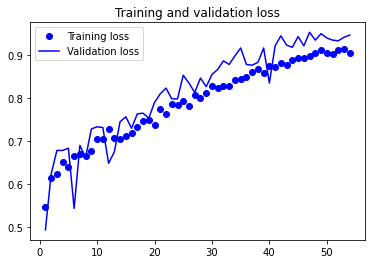

In [16]:
import matplotlib.pyplot as plt

acc=cb_pat_7.history['acc']
val_acc=cb_pat_7.history['val_acc']
loss=cb_pat_7.history['loss']
val_loss=cb_pat_7.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accurcay')
plt.plot(epochs, val_acc,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

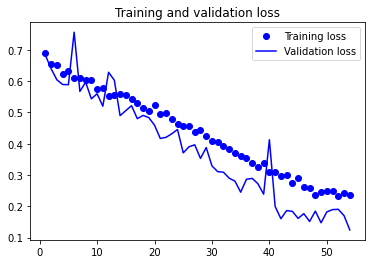

In [17]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### 4) Maximizing val_accuracy with patience 8

In [13]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
my_callbacks = [callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=8),
                callbacks.ModelCheckpoint('C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/best_model.h5')]

In [15]:
cb_pat_8=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30,
                           callbacks=my_callbacks)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 27s 384ms/step - loss: 0.6958 - acc: 0.5227 - val_loss: 0.6712 - val_acc: 0.5683
Epoch 2/100
61/61 [==============================] - 16s 266ms/step - loss: 0.6597 - acc: 0.6036 - val_loss: 0.6202 - val_acc: 0.6483
Epoch 3/100
61/61 [==============================] - 20s 322ms/step - loss: 0.6488 - acc: 0.6286 - val_loss: 0.6400 - val_acc: 0.6150
Epoch 4/100
61/61 [==============================] - 16s 256ms/step - loss: 0.6184 - acc: 0.6663 - val_loss: 0.6539 - val_acc: 0.6050
Epoch 5/100
61/61 [==============================] - 15s 238ms/step - loss: 0.6183 - acc: 0.6600 - val_loss: 0.6230 - val_acc: 0.6433
Epoch 6/100
61/61 [==============================] - 16s 263ms/step - loss: 0.6120 - acc: 0.6462 - val_loss: 0.8304 - val_acc: 0.5367
Epoch 7/100
61/61 [==============================] - 16s 256ms/step - loss: 0.6243 - acc: 0.6701 - val_loss: 0.6152 - val_acc: 0.6517
Epoch 8/100
61/61 [==============================] - 14s 234ms

Epoch 62/100
61/61 [==============================] - 15s 244ms/step - loss: 0.1981 - acc: 0.9186 - val_loss: 0.0959 - val_acc: 0.9667
Epoch 63/100
61/61 [==============================] - 15s 253ms/step - loss: 0.2167 - acc: 0.9143 - val_loss: 0.1245 - val_acc: 0.9483
Epoch 64/100
61/61 [==============================] - 15s 246ms/step - loss: 0.1677 - acc: 0.9396 - val_loss: 0.0946 - val_acc: 0.9617
Epoch 65/100
61/61 [==============================] - 16s 259ms/step - loss: 0.1874 - acc: 0.9198 - val_loss: 0.1455 - val_acc: 0.9400
Epoch 66/100
61/61 [==============================] - 16s 261ms/step - loss: 0.1934 - acc: 0.9174 - val_loss: 0.1069 - val_acc: 0.9650
Epoch 67/100
61/61 [==============================] - 15s 252ms/step - loss: 0.1668 - acc: 0.9446 - val_loss: 0.1081 - val_acc: 0.9567
Epoch 68/100
61/61 [==============================] - 15s 248ms/step - loss: 0.1695 - acc: 0.9289 - val_loss: 0.0825 - val_acc: 0.9750
Epoch 69/100
61/61 [==============================] - 1

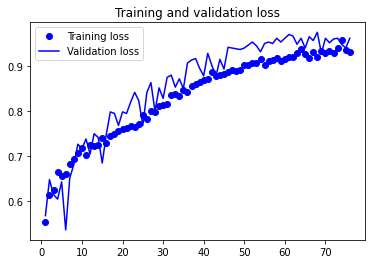

In [16]:
import matplotlib.pyplot as plt

acc=cb_pat_8.history['acc']
val_acc=cb_pat_8.history['val_acc']
loss=cb_pat_8.history['loss']
val_loss=cb_pat_8.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs, val_acc,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

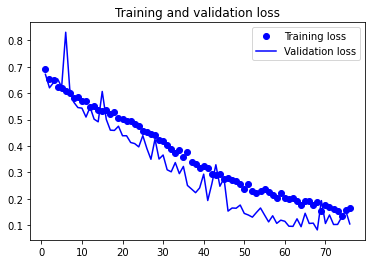

In [17]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(100, 100),
                                                batch_size=20, #or =20,
                                                class_mode='binary',
                                                seed=42)

### 5) Minimizing val_loss with patience 7

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
my_callbacks = [callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7),
                callbacks.ModelCheckpoint('C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/best_model.h5')]

In [16]:
cb_l_pat_7=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30,
                           callbacks=my_callbacks)

C:\Users\matip\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 49s 790ms/step - loss: 0.6956 - acc: 0.4812 - val_loss: 0.6934 - val_acc: 0.4833
Epoch 2/100
61/61 [==============================] - 23s 378ms/step - loss: 0.6525 - acc: 0.6153 - val_loss: 0.6191 - val_acc: 0.6817
Epoch 3/100
61/61 [==============================] - 19s 309ms/step - loss: 0.6422 - acc: 0.6462 - val_loss: 0.6687 - val_acc: 0.5950
Epoch 4/100
61/61 [==============================] - 21s 337ms/step - loss: 0.6491 - acc: 0.6141 - val_loss: 0.6046 - val_acc: 0.6550
Epoch 5/100
61/61 [==============================] - 22s 354ms/step - loss: 0.6222 - acc: 0.6568 - val_loss: 0.5871 - val_acc: 0.6800
Epoch 6/100
61/61 [==============================] - 19s 317ms/step - loss: 0.6154 - acc: 0.6658 - val_loss: 0.5813 - val_acc: 0.6850
Epoch 7/100
61/61 [==============================] - 20s 326ms/step - loss: 0.5985 - acc: 0.6931 - val_loss: 0.5597 - val_acc: 0.7117
Epoch 8/100
61/61 [==============================] - 19s 318ms

Epoch 62/100
61/61 [==============================] - 21s 342ms/step - loss: 0.2319 - acc: 0.9138 - val_loss: 0.1525 - val_acc: 0.9400
Epoch 63/100
61/61 [==============================] - 21s 338ms/step - loss: 0.2104 - acc: 0.9190 - val_loss: 0.1699 - val_acc: 0.9400
Epoch 64/100
61/61 [==============================] - 19s 314ms/step - loss: 0.2179 - acc: 0.9119 - val_loss: 0.1189 - val_acc: 0.9550
Epoch 65/100
61/61 [==============================] - 19s 315ms/step - loss: 0.2073 - acc: 0.9140 - val_loss: 0.1187 - val_acc: 0.9500
Epoch 66/100
61/61 [==============================] - 19s 311ms/step - loss: 0.2270 - acc: 0.9148 - val_loss: 0.1103 - val_acc: 0.9550
Epoch 67/100
61/61 [==============================] - 19s 308ms/step - loss: 0.1851 - acc: 0.9134 - val_loss: 0.1112 - val_acc: 0.9600
Epoch 68/100
61/61 [==============================] - 19s 315ms/step - loss: 0.1776 - acc: 0.9181 - val_loss: 0.1213 - val_acc: 0.9483
Epoch 69/100
61/61 [==============================] - 1

### 6) Maximizing val_accuracy with patience 7 and dropout rate 0.2

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
my_callbacks = [callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=7),
                callbacks.ModelCheckpoint('C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/best_model_new.h5')]

In [16]:
cb_pat_7=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30,
                           callbacks=my_callbacks)

Epoch 1/100
61/61 [==============================] - 23s 369ms/step - loss: 0.6969 - acc: 0.5022 - val_loss: 0.6868 - val_acc: 0.4767
Epoch 2/100
61/61 [==============================] - 15s 254ms/step - loss: 0.6635 - acc: 0.6016 - val_loss: 0.6549 - val_acc: 0.5900
Epoch 3/100
61/61 [==============================] - 16s 258ms/step - loss: 0.6469 - acc: 0.6276 - val_loss: 0.6155 - val_acc: 0.6650
Epoch 4/100
61/61 [==============================] - 16s 267ms/step - loss: 0.6148 - acc: 0.6741 - val_loss: 0.6545 - val_acc: 0.6100
Epoch 5/100
61/61 [==============================] - 16s 255ms/step - loss: 0.6157 - acc: 0.6667 - val_loss: 0.6006 - val_acc: 0.6633
Epoch 6/100
61/61 [==============================] - 16s 255ms/step - loss: 0.5994 - acc: 0.6907 - val_loss: 0.5734 - val_acc: 0.6917
Epoch 7/100
61/61 [==============================] - 16s 258ms/step - loss: 0.5993 - acc: 0.6631 - val_loss: 0.5648 - val_acc: 0.6933
Epoch 8/100
61/61 [==============================] - 16s 254ms

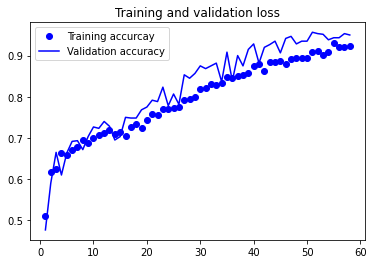

In [17]:
import matplotlib.pyplot as plt

acc=cb_pat_7.history['acc']
val_acc=cb_pat_7.history['val_acc']
loss=cb_pat_7.history['loss']
val_loss=cb_pat_7.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accurcay')
plt.plot(epochs, val_acc,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

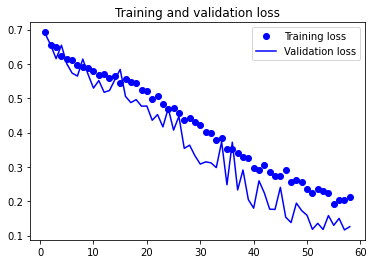

In [18]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

<div class="alert alert-block alert-info">

## Best Model</font> <a class="anchor" id="bm"></a>
  [Back to introduction](#title)
</div>

### 7) Maximizing val_accuracy with patience 7, dropout rate 0.2 and Adam optimizer

In [13]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
my_callbacks = [callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=7),
                callbacks.ModelCheckpoint('C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/best_model_new.h5')]

In [15]:
cb_pat_7_adam=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30,
                           callbacks=my_callbacks)

Epoch 1/100
61/61 [==============================] - 21s 334ms/step - loss: 0.7065 - acc: 0.5022 - val_loss: 0.7054 - val_acc: 0.5400
Epoch 2/100
61/61 [==============================] - 15s 244ms/step - loss: 0.6691 - acc: 0.6016 - val_loss: 0.6748 - val_acc: 0.6250
Epoch 3/100
61/61 [==============================] - 14s 225ms/step - loss: 0.6580 - acc: 0.6310 - val_loss: 0.6494 - val_acc: 0.6250
Epoch 4/100
61/61 [==============================] - 15s 247ms/step - loss: 0.6368 - acc: 0.6273 - val_loss: 0.5911 - val_acc: 0.6850
Epoch 5/100
61/61 [==============================] - 15s 242ms/step - loss: 0.6294 - acc: 0.6435 - val_loss: 0.6007 - val_acc: 0.6683
Epoch 6/100
61/61 [==============================] - 14s 234ms/step - loss: 0.6416 - acc: 0.6511 - val_loss: 0.6410 - val_acc: 0.6533
Epoch 7/100
61/61 [==============================] - 15s 238ms/step - loss: 0.6036 - acc: 0.6655 - val_loss: 0.5789 - val_acc: 0.6900
Epoch 8/100
61/61 [==============================] - 14s 227ms

In [124]:
model.save('best_model_adam.h5')

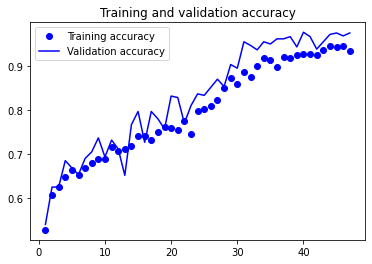

In [122]:
import matplotlib.pyplot as plt

acc=cb_pat_7_adam.history['acc']
val_acc=cb_pat_7_adam.history['val_acc']
loss=cb_pat_7_adam.history['loss']
val_loss=cb_pat_7_adam.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs, val_acc,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

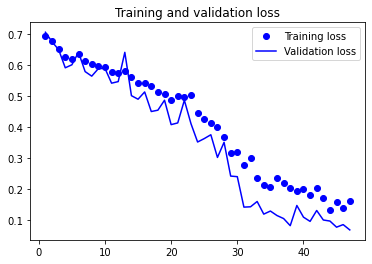

In [123]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

#### Assesing model performance on test set

In [21]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(100, 100),
                                                batch_size=4,
                                                class_mode=None,
                                                shuffle=False,
                                                seed=42)

Found 0 images belonging to 0 classes.


In [57]:
step_size=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,steps=step_size,verbose=1)

151/151 [==============================] - 2s 16ms/step


In [83]:
predicted_class_indices=[]
for i in range(len(pred)):
    if pred[i]>0.5:
        predicted_class_indices.append(1)
    else:
        predicted_class_indices.append(0)

In [84]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [85]:
import pandas as pd

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})
results.to_csv("results_agora.csv",index=False)

In [115]:
y_true=[1 for i in range(307)]
y_true.extend([0 for i in range(297)])

y_pred = predicted_class_indices

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=['close','open']))

              precision    recall  f1-score   support

       close       0.96      0.97      0.97       297
        open       0.97      0.96      0.97       307

    accuracy                           0.97       604
   macro avg       0.97      0.97      0.97       604
weighted avg       0.97      0.97      0.97       604



In [120]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[289,   8],
       [ 11, 296]], dtype=int64)

### 8) Adding weight regularization (L2)

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [15]:
my_callbacks = [callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=7),
                callbacks.ModelCheckpoint('C:/Users/matip/Documents/Mestrado/2. Deep Learning/Project/best_model_new.h5')]

In [16]:
cb_pat_7_adam=model.fit_generator(train_generator, 
                            steps_per_epoch=61,
                            epochs=100, 
                            validation_data=validation_generator,
                            validation_steps=30,
                           callbacks=my_callbacks)

Epoch 1/100
61/61 [==============================] - 37s 571ms/step - loss: 4.5426 - acc: 0.5086 - val_loss: 0.7194 - val_acc: 0.4750
Epoch 2/100
61/61 [==============================] - 22s 362ms/step - loss: 0.7035 - acc: 0.5192 - val_loss: 0.6812 - val_acc: 0.5767
Epoch 3/100
61/61 [==============================] - 23s 372ms/step - loss: 0.6763 - acc: 0.6210 - val_loss: 0.6771 - val_acc: 0.5317
Epoch 4/100
61/61 [==============================] - 20s 326ms/step - loss: 0.6883 - acc: 0.5336 - val_loss: 0.6386 - val_acc: 0.6450
Epoch 5/100
61/61 [==============================] - 19s 314ms/step - loss: 0.6784 - acc: 0.6052 - val_loss: 0.6490 - val_acc: 0.6200
Epoch 6/100
61/61 [==============================] - 18s 289ms/step - loss: 0.6386 - acc: 0.6642 - val_loss: 0.6470 - val_acc: 0.6433
Epoch 7/100
61/61 [==============================] - 18s 295ms/step - loss: 0.6319 - acc: 0.6661 - val_loss: 0.6310 - val_acc: 0.6750
Epoch 8/100
61/61 [==============================] - 19s 304ms

Epoch 62/100
61/61 [==============================] - 19s 317ms/step - loss: 0.1432 - acc: 0.9515 - val_loss: 0.1544 - val_acc: 0.9483
Epoch 63/100
61/61 [==============================] - 20s 328ms/step - loss: 0.2041 - acc: 0.9298 - val_loss: 0.1086 - val_acc: 0.9617
Epoch 64/100
61/61 [==============================] - 20s 330ms/step - loss: 0.1438 - acc: 0.9654 - val_loss: 0.0971 - val_acc: 0.9683
Epoch 65/100
61/61 [==============================] - 20s 332ms/step - loss: 0.1577 - acc: 0.9562 - val_loss: 0.1111 - val_acc: 0.9700
Epoch 66/100
61/61 [==============================] - 20s 321ms/step - loss: 0.1514 - acc: 0.9501 - val_loss: 0.0924 - val_acc: 0.9767
Epoch 00066: early stopping


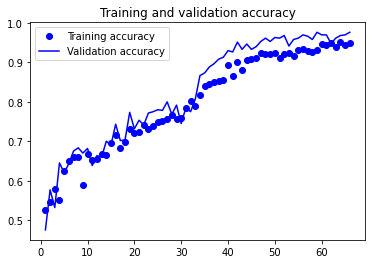

In [17]:
import matplotlib.pyplot as plt

acc=cb_pat_7_adam.history['acc']
val_acc=cb_pat_7_adam.history['val_acc']
loss=cb_pat_7_adam.history['loss']
val_loss=cb_pat_7_adam.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs, val_acc,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

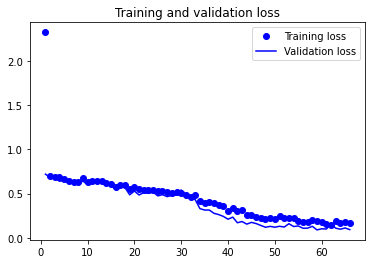

In [18]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

#### Assesing model performance on test set

In [33]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(100, 100),
                                                batch_size=4,
                                                class_mode=None,
                                                shuffle=False,
                                                seed=42)

Found 604 images belonging to 1 classes.


In [34]:
step_size=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,steps=step_size,verbose=1)

151/151 [==============================] - 12s 75ms/step


In [35]:
predicted_class_indices=[]
for i in range(len(pred)):
    if pred[i]>0.5:
        predicted_class_indices.append(1)
    else:
        predicted_class_indices.append(0)

In [36]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [37]:
import pandas as pd

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})
results.to_csv("results_agora.csv",index=False)

In [38]:
y_true=[1 for i in range(307)]
y_true.extend([0 for i in range(297)])

y_pred = predicted_class_indices

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=['close','open']))

              precision    recall  f1-score   support

       close       0.96      0.94      0.95       297
        open       0.95      0.96      0.95       307

    accuracy                           0.95       604
   macro avg       0.95      0.95      0.95       604
weighted avg       0.95      0.95      0.95       604



<div class="alert alert-block alert-info">

## Drowsiness System Implementation</font> <a class="anchor" id="system"></a>
  [Back to introduction](#title)
</div>

In [2]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time

In [3]:
mixer.init()
sound = mixer.Sound('alarm.wav')

face = cv2.CascadeClassifier('haar cascade files\haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haar cascade files\haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('haar cascade files\haarcascade_righteye_2splits.xml')

In [4]:
lbl=['Close','Open']

model = load_model('C:/Users/vasco/OneDrive/Ambiente de Trabalho/Mestrado - Data Science/2º semestre/Deep Learning/Project/best_model_adam.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

In [5]:
while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 

    color = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    faces = face.detectMultiScale(color,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(color)
    right_eye =  reye.detectMultiScale(color)

    cv2.rectangle(frame, (0,height-50) , (200,height) , (226,239,219) , thickness=cv2.FILLED )

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2RGB)
        r_eye = cv2.resize(r_eye,(100,100))
        r_eye= r_eye/255
        r_eye = r_eye.reshape(100,100,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = model.predict_classes(r_eye)
        if(rpred[0]==1):
            lbl='Open' 
        if(rpred[0]==0):
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2RGB)  
        l_eye = cv2.resize(l_eye,(100,100))
        l_eye= l_eye/255
        l_eye=l_eye.reshape(100,100,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = model.predict_classes(l_eye)
        if(lpred[0]==1):
            lbl='Open'   
        if(lpred[0]==0):
            lbl='Closed'
        break

    if(rpred[0]==0 and lpred[0]==0):
        score=score+1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(0,0,0),1,cv2.LINE_AA)
    else:
        score=score-1
        cv2.putText(frame,"Open",(10,height-20), font, 1,(0,0,0),1,cv2.LINE_AA)
    

    if(score<0):
        score=0   
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(0,0,0),1,cv2.LINE_AA)
    if(score>15): # the alarm beeps if the person is sleepy (score reaches 15)
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
            sound.play()

        except:
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()